# Problem Satatement 
Given a specific activation function
g(x) = k0 + k1x (1)
and categorical cross-entropy loss, design a Neural Network on
Banknote, MNIST or IRIS data where the activation function
parameters k0, k1 are learned from the data you choose from
one of the above-mentioned data sets. Your solution must
include the learnable parameter values i.e. final k0, k1 values
at the end of training, a plot depicting changes in k0, k1 at
each epoch, training vs test loss, train vs. test accuracy and a
Loss function plot.

In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score , classification_report


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [38]:
iris = pd.read_csv('datasets/Iris.csv')

In [39]:
iris.drop(['Id'] , axis=1 , inplace=True)

In [40]:
le = LabelEncoder()
iris.Species = le.fit_transform(iris.Species)

In [41]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
train , test  = train_test_split(iris , test_size=0.2);

In [43]:
train_x = train.drop(['Species'] , axis=1)
train_y = train.Species
test_x = test.drop(['Species'] , axis=1)
test_y = test.Species

train_y = to_categorical(train_y)

In [44]:
class iris_model:


    
    def __init__(self , activation_fun , train_x , train_y , test_x , test_y):
        self.activation_fun = activation_fun
        self.train_x = train_x
        self.train_y =train_y
        self.test_x = test_x
        self.test_y = test_y
        self.model = Sequential()
        self.weights_dict = {}
        self.history = []
        self.cls_rpt =[]
        self.accuracy =0
        self.f1_score = 0
        self.conf_matrix=[]
        self.loss = 0
        self.pred =[]
        self.f1_score=0
        self.k_vals=[]
    
    def execute_model(self):
        self.model = Sequential()
        self.model.add(Dense(4, activation=self.activation_fun ,name ='L0',kernel_initializer='he_uniform' ))
        self.model.add(Dense(6,activation=self.activation_fun , name='L1' , kernel_initializer='he_uniform'))
        self.model.add(Dense(3 , activation='softmax', name='O'))
        self.model.compile(optimizer='Adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

        #weight callback -----------------------------------------
        weight_callback = keras.callbacks.LambdaCallback \
        ( on_epoch_end=lambda epoch, logs: self.weights_dict.update({epoch:self.model.get_weights()}))
        
        #history---------------------------------------------------
        self.history =self.model.fit(self.train_x , self.train_y , validation_split=0.2 , epochs=150 , callbacks=[weight_callback])        
        
        #prediction -----------------------------------------------
        self.pred = self.model.predict_classes(self.test_x)
        
        #Performance evaluaion matrices-----------------------------
        self.conf_matrix = confusion_matrix(self.pred , self.test_y)
        self.accuracy = np.sum(np.diag(self.conf_matrix))/np.sum(self.conf_matrix)
        self.cls_rpt = classification_report(self.test_y , self.pred)
        self.f1_score = f1_score(self.test_y ,self.pred ,average='micro')
        #weight for each layer-------------------------------------
        for k in range(0 , len(models[0].weights_dict[0])):
            kn=[]
            for j in range(0,50):
                kn.append(self.weights_dict.get(j)[k].mean())
            self.k_vals.append(kn)
            
        

In [45]:
iris_elu = iris_model('elu',train_x , train_y , test_x , test_y)
iris_relu = iris_model('relu',train_x , train_y , test_x , test_y)
iris_sigmoid = iris_model('sigmoid',train_x , train_y , test_x , test_y)
iris_tanh = iris_model('tanh',train_x , train_y , test_x , test_y)

In [46]:
models=[iris_elu , iris_relu , iris_sigmoid , iris_tanh ]

In [47]:
for i in models:
    i.execute_model()

Epoch 1/150
3/3 [==============================] - 2s 287ms/step - loss: 10.2638 - accuracy: 0.3060 - val_loss: 10.1131 - val_accuracy: 0.3750
Epoch 2/150
3/3 [==============================] - 0s 65ms/step - loss: 9.8775 - accuracy: 0.3021 - val_loss: 9.8693 - val_accuracy: 0.3750
Epoch 3/150
3/3 [==============================] - 0s 61ms/step - loss: 8.7701 - accuracy: 0.3607 - val_loss: 9.6324 - val_accuracy: 0.3750
Epoch 4/150
3/3 [==============================] - 0s 47ms/step - loss: 8.7954 - accuracy: 0.3255 - val_loss: 9.3970 - val_accuracy: 0.3750
Epoch 5/150
3/3 [==============================] - 0s 55ms/step - loss: 8.6200 - accuracy: 0.3568 - val_loss: 9.1644 - val_accuracy: 0.3750
Epoch 6/150
3/3 [==============================] - 0s 60ms/step - loss: 8.2485 - accuracy: 0.3255 - val_loss: 8.9365 - val_accuracy: 0.3750
Epoch 7/150
3/3 [==============================] - 0s 47ms/step - loss: 8.0884 - accuracy: 0.3411 - val_loss: 8.7120 - val_accuracy: 0.3750
Epoch 8/150
3/3 [

3/3 [==============================] - 0s 56ms/step - loss: 1.1614 - accuracy: 0.2409 - val_loss: 1.1667 - val_accuracy: 0.2917
Epoch 118/150
3/3 [==============================] - 0s 54ms/step - loss: 1.1668 - accuracy: 0.2279 - val_loss: 1.1655 - val_accuracy: 0.2500
Epoch 119/150
3/3 [==============================] - 0s 54ms/step - loss: 1.1670 - accuracy: 0.2370 - val_loss: 1.1643 - val_accuracy: 0.2500
Epoch 120/150
3/3 [==============================] - 0s 52ms/step - loss: 1.1464 - accuracy: 0.2096 - val_loss: 1.1633 - val_accuracy: 0.2500
Epoch 121/150
3/3 [==============================] - 0s 52ms/step - loss: 1.1585 - accuracy: 0.2122 - val_loss: 1.1622 - val_accuracy: 0.2500
Epoch 122/150
3/3 [==============================] - 0s 48ms/step - loss: 1.1681 - accuracy: 0.1927 - val_loss: 1.1610 - val_accuracy: 0.2500
Epoch 123/150
3/3 [==============================] - 0s 58ms/step - loss: 1.1591 - accuracy: 0.1914 - val_loss: 1.1602 - val_accuracy: 0.2500
Epoch 124/150
3/3 [=

C:\Users\Sreeraj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Sreeraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/150


C:\Users\Sreeraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sreeraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 1s 240ms/step - loss: 4.9507 - accuracy: 0.3828 - val_loss: 5.3646 - val_accuracy: 0.2500
Epoch 2/150
3/3 [==============================] - 0s 50ms/step - loss: 4.4354 - accuracy: 0.3945 - val_loss: 5.1425 - val_accuracy: 0.2500
Epoch 3/150
3/3 [==============================] - 0s 53ms/step - loss: 3.9301 - accuracy: 0.3867 - val_loss: 4.9301 - val_accuracy: 0.2500
Epoch 4/150
3/3 [==============================] - 0s 60ms/step - loss: 4.4247 - accuracy: 0.3398 - val_loss: 4.7265 - val_accuracy: 0.2500
Epoch 5/150
3/3 [==============================] - 0s 48ms/step - loss: 3.4752 - accuracy: 0.3789 - val_loss: 4.5388 - val_accuracy: 0.2500
Epoch 6/150
3/3 [==============================] - 0s 50ms/step - loss: 3.8873 - accuracy: 0.3672 - val_loss: 4.3587 - val_accuracy: 0.2500
Epoch 7/150
3/3 [==============================] - 0s 58ms/step - loss: 3.5448 - accuracy: 0.3750 - val_loss: 4.1896 - val_accuracy: 0.2500
Epoch 8/150
3/3 [==============

3/3 [==============================] - 0s 68ms/step - loss: 0.6941 - accuracy: 0.9557 - val_loss: 0.6830 - val_accuracy: 0.9167
Epoch 118/150
3/3 [==============================] - 0s 60ms/step - loss: 0.6882 - accuracy: 0.9596 - val_loss: 0.6785 - val_accuracy: 0.9167
Epoch 119/150
3/3 [==============================] - 0s 64ms/step - loss: 0.6686 - accuracy: 0.9518 - val_loss: 0.6741 - val_accuracy: 0.9167
Epoch 120/150
3/3 [==============================] - 0s 60ms/step - loss: 0.6704 - accuracy: 0.9688 - val_loss: 0.6704 - val_accuracy: 0.9167
Epoch 121/150
3/3 [==============================] - 0s 60ms/step - loss: 0.6726 - accuracy: 0.9805 - val_loss: 0.6670 - val_accuracy: 0.9167
Epoch 122/150
3/3 [==============================] - 0s 60ms/step - loss: 0.6786 - accuracy: 0.9609 - val_loss: 0.6635 - val_accuracy: 0.9167
Epoch 123/150
3/3 [==============================] - 0s 52ms/step - loss: 0.6671 - accuracy: 0.9661 - val_loss: 0.6596 - val_accuracy: 0.9167
Epoch 124/150
3/3 [=

C:\Users\Sreeraj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/150
3/3 [==============================] - 1s 234ms/step - loss: 1.0725 - accuracy: 0.3060 - val_loss: 1.0189 - val_accuracy: 0.3750
Epoch 2/150
3/3 [==============================] - 0s 52ms/step - loss: 1.0742 - accuracy: 0.2982 - val_loss: 1.0159 - val_accuracy: 0.3750
Epoch 3/150
3/3 [==============================] - 0s 52ms/step - loss: 1.0618 - accuracy: 0.3060 - val_loss: 1.0130 - val_accuracy: 0.3750
Epoch 4/150
3/3 [==============================] - 0s 56ms/step - loss: 1.0529 - accuracy: 0.3216 - val_loss: 1.0104 - val_accuracy: 0.3750
Epoch 5/150
3/3 [==============================] - 0s 52ms/step - loss: 1.0547 - accuracy: 0.2982 - val_loss: 1.0078 - val_accuracy: 0.3750
Epoch 6/150
3/3 [==============================] - 0s 52ms/step - loss: 1.0365 - accuracy: 0.3411 - val_loss: 1.0055 - val_accuracy: 0.3750
Epoch 7/150
3/3 [==============================] - 0s 56ms/step - loss: 1.0420 - accuracy: 0.2982 - val_loss: 1.0033 - val_accuracy: 0.3750
Epoch 8/150
3/3 [==

3/3 [==============================] - 0s 52ms/step - loss: 0.8142 - accuracy: 0.9297 - val_loss: 0.8631 - val_accuracy: 0.7083
Epoch 118/150
3/3 [==============================] - 0s 59ms/step - loss: 0.8205 - accuracy: 0.8867 - val_loss: 0.8615 - val_accuracy: 0.7083
Epoch 119/150
3/3 [==============================] - 0s 56ms/step - loss: 0.8082 - accuracy: 0.9141 - val_loss: 0.8600 - val_accuracy: 0.7083
Epoch 120/150
3/3 [==============================] - 0s 52ms/step - loss: 0.8094 - accuracy: 0.9115 - val_loss: 0.8585 - val_accuracy: 0.7083
Epoch 121/150
3/3 [==============================] - 0s 49ms/step - loss: 0.8158 - accuracy: 0.9193 - val_loss: 0.8569 - val_accuracy: 0.7083
Epoch 122/150
3/3 [==============================] - 0s 49ms/step - loss: 0.8164 - accuracy: 0.9193 - val_loss: 0.8553 - val_accuracy: 0.7083
Epoch 123/150
3/3 [==============================] - 0s 49ms/step - loss: 0.8109 - accuracy: 0.9232 - val_loss: 0.8538 - val_accuracy: 0.7083
Epoch 124/150
3/3 [=

C:\Users\Sreeraj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/150
3/3 [==============================] - 1s 242ms/step - loss: 1.2316 - accuracy: 0.3490 - val_loss: 1.2616 - val_accuracy: 0.3750
Epoch 2/150
3/3 [==============================] - 0s 57ms/step - loss: 1.2638 - accuracy: 0.3099 - val_loss: 1.2480 - val_accuracy: 0.3750
Epoch 3/150
3/3 [==============================] - 0s 53ms/step - loss: 1.2597 - accuracy: 0.2943 - val_loss: 1.2350 - val_accuracy: 0.3750
Epoch 4/150
3/3 [==============================] - 0s 47ms/step - loss: 1.2102 - accuracy: 0.3451 - val_loss: 1.2222 - val_accuracy: 0.3750
Epoch 5/150
3/3 [==============================] - 0s 48ms/step - loss: 1.1626 - accuracy: 0.3958 - val_loss: 1.2100 - val_accuracy: 0.3750
Epoch 6/150
3/3 [==============================] - 0s 57ms/step - loss: 1.1786 - accuracy: 0.3333 - val_loss: 1.1984 - val_accuracy: 0.3750
Epoch 7/150
3/3 [==============================] - 0s 53ms/step - loss: 1.1831 - accuracy: 0.3255 - val_loss: 1.1870 - val_accuracy: 0.3750
Epoch 8/150
3/3 [==

3/3 [==============================] - 0s 48ms/step - loss: 0.4903 - accuracy: 0.9831 - val_loss: 0.5849 - val_accuracy: 0.9583
Epoch 118/150
3/3 [==============================] - 0s 63ms/step - loss: 0.5253 - accuracy: 1.0000 - val_loss: 0.5829 - val_accuracy: 0.9583
Epoch 119/150
3/3 [==============================] - 0s 58ms/step - loss: 0.4926 - accuracy: 1.0000 - val_loss: 0.5809 - val_accuracy: 0.9583
Epoch 120/150
3/3 [==============================] - 0s 52ms/step - loss: 0.5028 - accuracy: 1.0000 - val_loss: 0.5789 - val_accuracy: 0.9583
Epoch 121/150
3/3 [==============================] - 0s 66ms/step - loss: 0.4813 - accuracy: 1.0000 - val_loss: 0.5770 - val_accuracy: 0.9583
Epoch 122/150
3/3 [==============================] - 0s 48ms/step - loss: 0.5062 - accuracy: 1.0000 - val_loss: 0.5751 - val_accuracy: 0.9583
Epoch 123/150
3/3 [==============================] - 0s 61ms/step - loss: 0.4862 - accuracy: 1.0000 - val_loss: 0.5732 - val_accuracy: 0.9583
Epoch 124/150
3/3 [=

C:\Users\Sreeraj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Confusion matrices

In [48]:
for i in models:
    print("Confusion matrix for -", i.activation_fun)
    print(i.conf_matrix)

Confusion matrix for - elu
[[ 0  0  0]
 [ 0  6 11]
 [ 8  4  1]]
Confusion matrix for - relu
[[ 8  0  0]
 [ 0  9  0]
 [ 0  1 12]]
Confusion matrix for - sigmoid
[[ 8  0  0]
 [ 0  5  0]
 [ 0  5 12]]
Confusion matrix for - tanh
[[ 8  0  0]
 [ 0  9  0]
 [ 0  1 12]]


### Classification Reports

In [49]:
for i in models:
    print("classification report for -", i.activation_fun,":","----------------------------")
    print(i.cls_rpt)

classification report for - elu : ----------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.35      0.60      0.44        10
           2       0.08      0.08      0.08        12

    accuracy                           0.23        30
   macro avg       0.14      0.23      0.17        30
weighted avg       0.15      0.23      0.18        30

classification report for - relu : ----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

classification report for - sigmoid : ----------------------------
              precision    recall  f1-score 

### Accuracy of models 

In [50]:
for i in models:
    print("Accuracy for -", i.activation_fun,":","----------------------------")
    print(i.accuracy)

Accuracy for - elu : ----------------------------
0.23333333333333334
Accuracy for - relu : ----------------------------
0.9666666666666667
Accuracy for - sigmoid : ----------------------------
0.8333333333333334
Accuracy for - tanh : ----------------------------
0.9666666666666667


### F1 - Scores

In [51]:
for i in models:
    print("f1 score for -", i.activation_fun,":","----------------------------")
    print(i.f1_score)

f1 score for - elu : ----------------------------
0.23333333333333334
f1 score for - relu : ----------------------------
0.9666666666666667
f1 score for - sigmoid : ----------------------------
0.8333333333333334
f1 score for - tanh : ----------------------------
0.9666666666666667


### Input Layer Weights Per Epooches

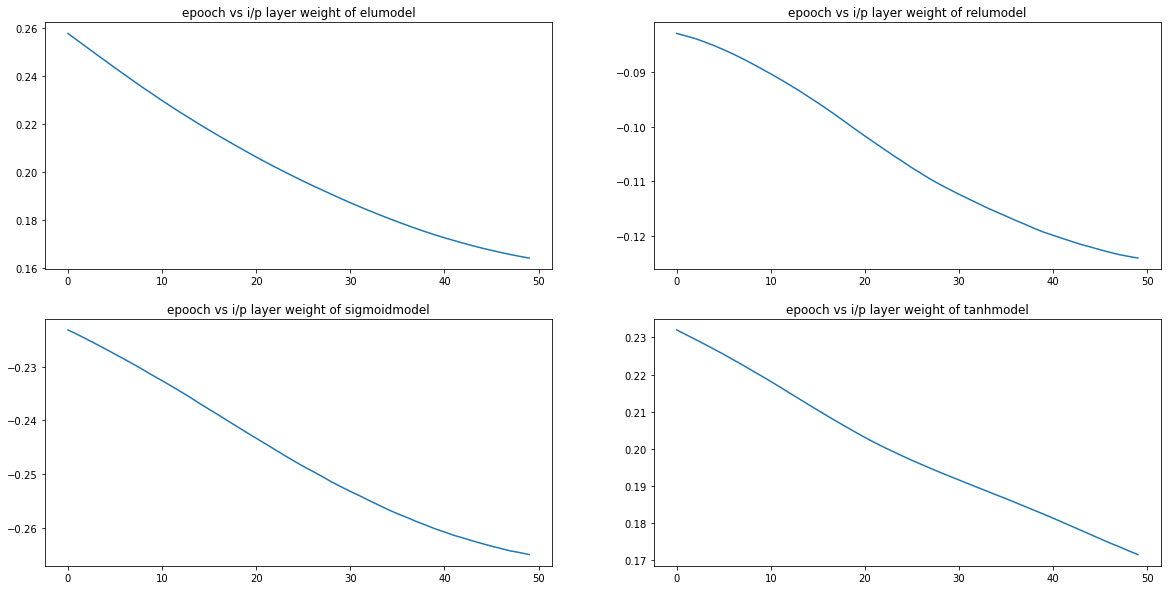

In [60]:
plt.figure(figsize=(20,10))
for i in range(0,len(models)):
    plt.subplot(2,2,i+1)
    plt.plot(list(range(0,50)) , models[i].k_vals[0] )
    plt.title("epooch vs i/p layer weight of "+ models[i].activation_fun+'model')

### Input Layer bias Per Epooches

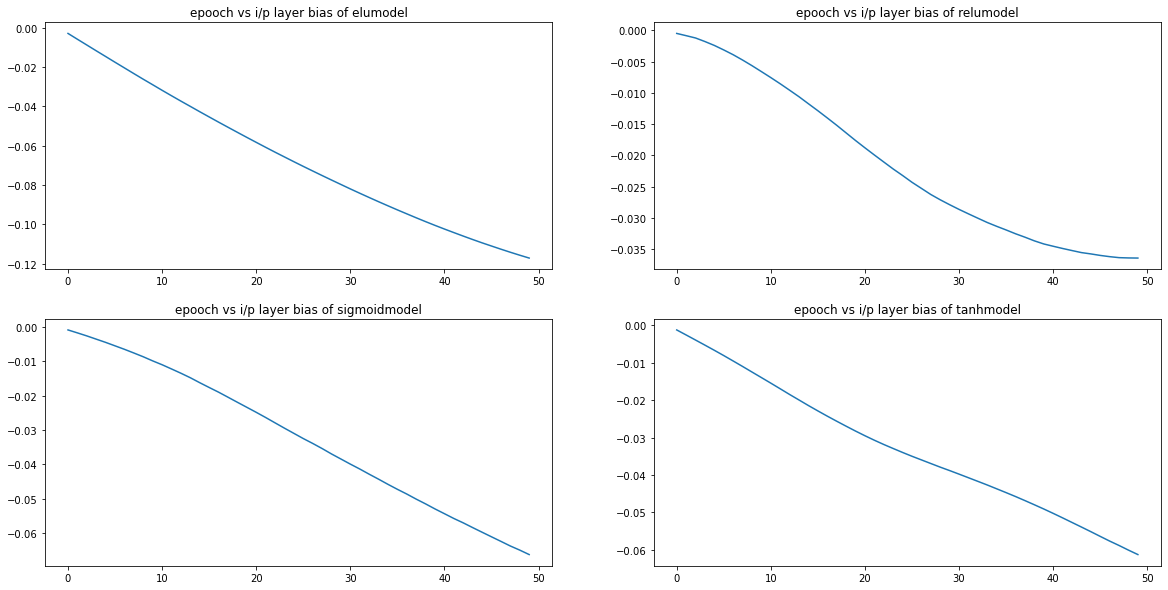

In [59]:
plt.figure(figsize=(20,10))
for i in range(0,len(models)):
    plt.subplot(2,2,i+1)
    plt.plot(list(range(0,50)) , models[i].k_vals[1] )
    plt.title("epooch vs i/p layer bias of "+ models[i].activation_fun+'model')

### HIdden Layer Weights Per Epooches

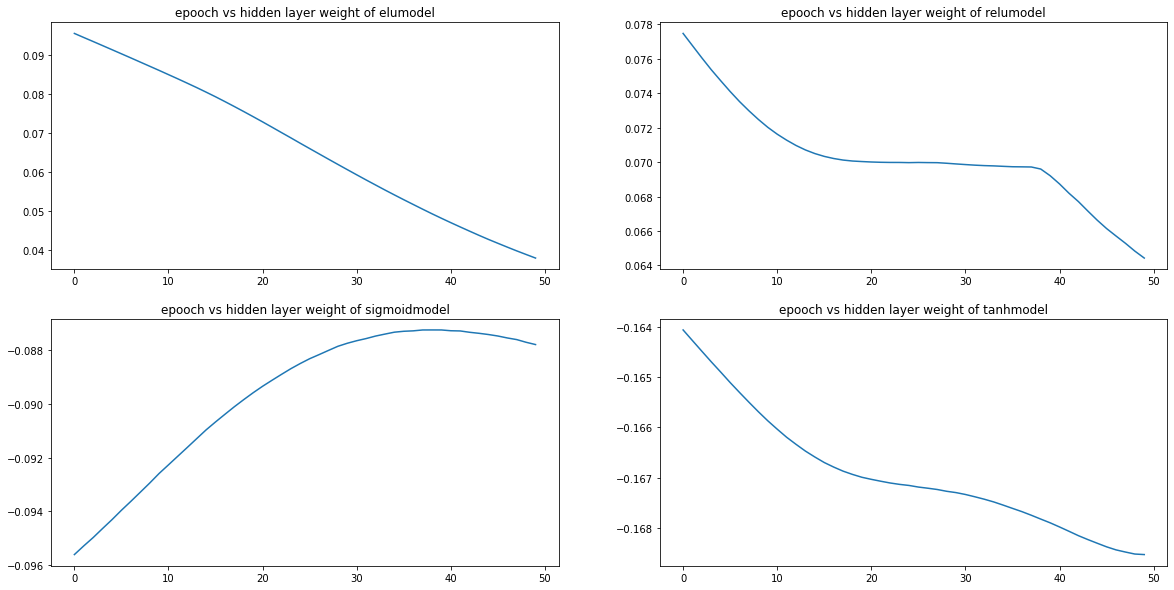

In [61]:
plt.figure(figsize=(20,10))
for i in range(0,len(models)):
    plt.subplot(2,2,i+1)
    plt.plot(list(range(0,50)) , models[i].k_vals[2] )
    plt.title("epooch vs hidden layer weight of "+ models[i].activation_fun+'model')

### Hidden Layer Bias Per Epooches

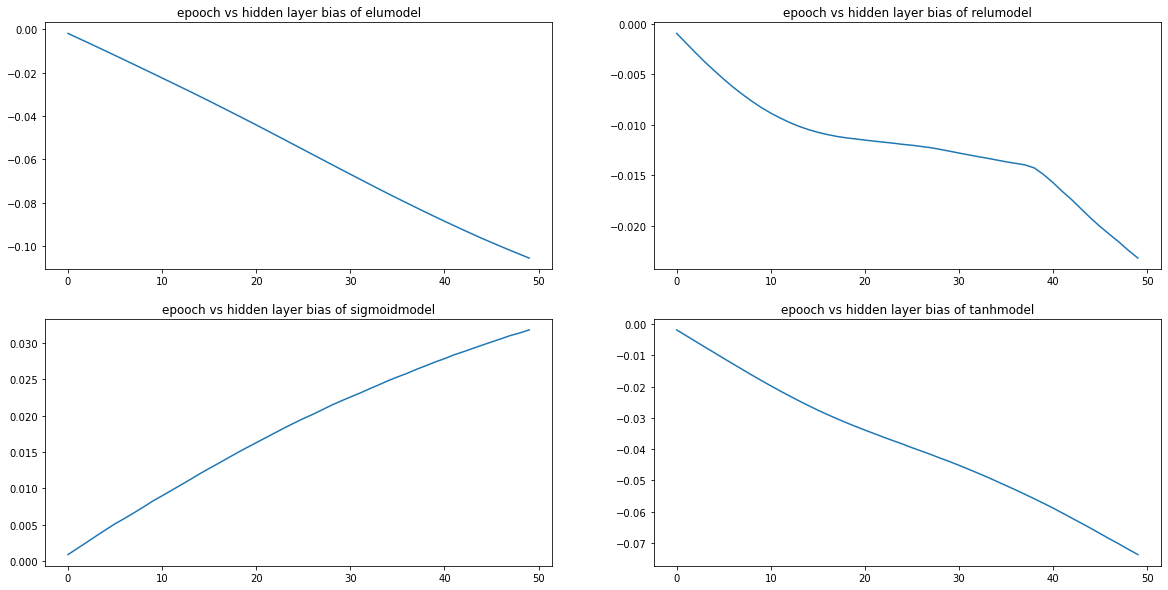

In [62]:
plt.figure(figsize=(20,10))
for i in range(0,len(models)):
    plt.subplot(2,2,i+1)
    plt.plot(list(range(0,50)) , models[i].k_vals[3] )
    plt.title("epooch vs hidden layer bias of "+ models[i].activation_fun+'model')

### Epooches vs O/p layer weights

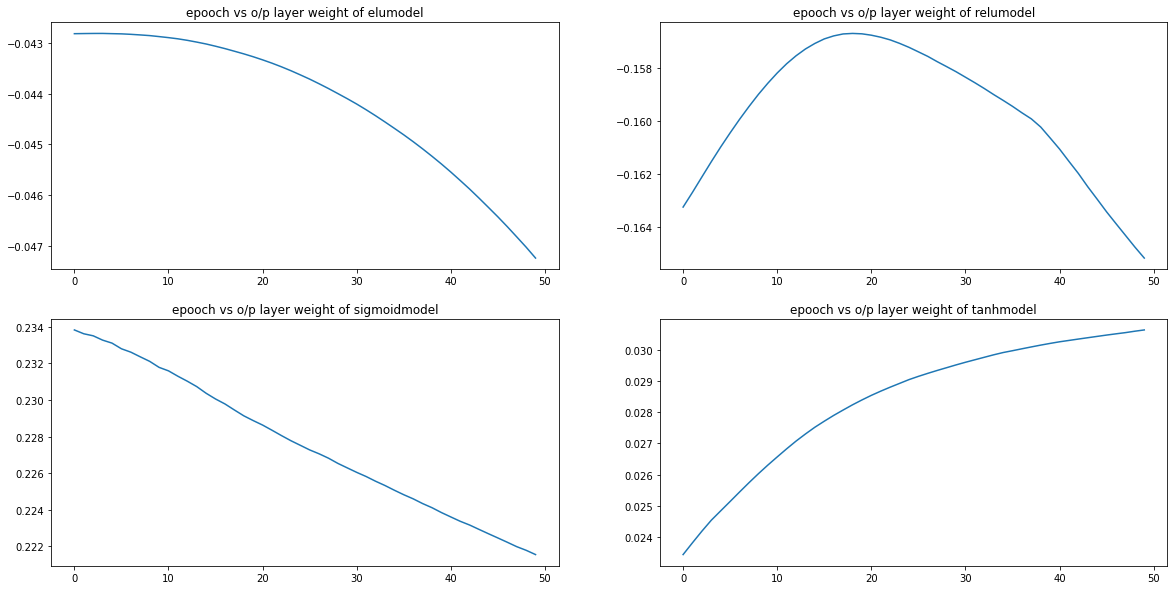

In [63]:
plt.figure(figsize=(20,10))
for i in range(0,len(models)):
    plt.subplot(2,2,i+1)
    plt.plot(list(range(0,50)) , models[i].k_vals[4] )
    plt.title("epooch vs o/p layer weight of "+ models[i].activation_fun+'model')

### Epooches vs O/p layer bias

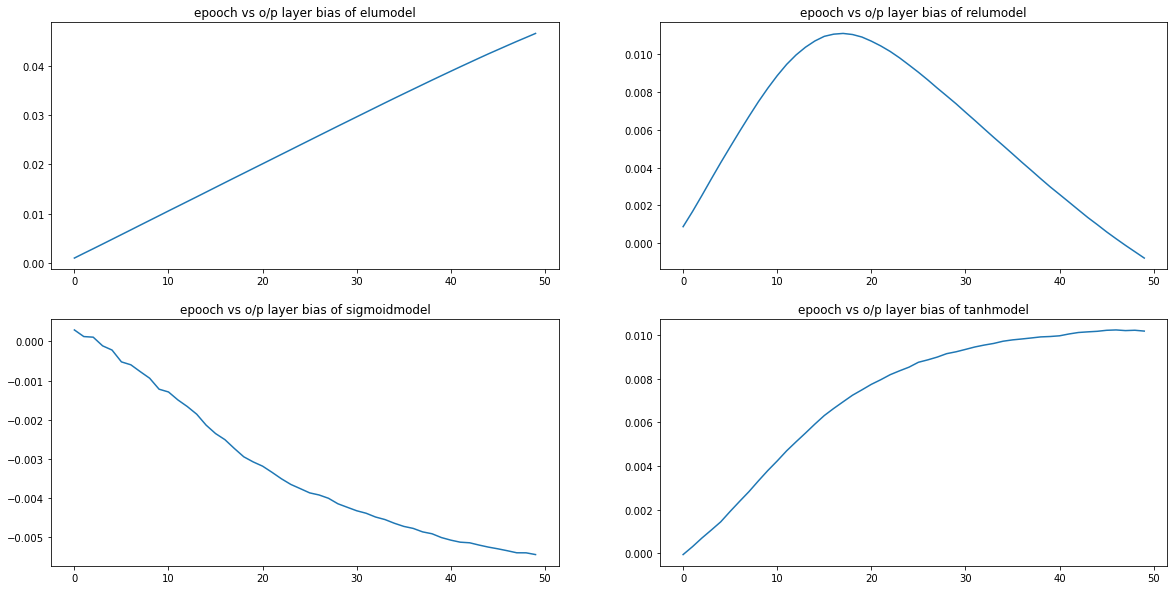

In [64]:
plt.figure(figsize=(20,10))
for i in range(0,len(models)):
    plt.subplot(2,2,i+1)
    plt.plot(list(range(0,50)) , models[i].k_vals[5] )
    plt.title("epooch vs o/p layer bias of "+ models[i].activation_fun+'model')

### Validation Loss Vs Actual Loss Graph 

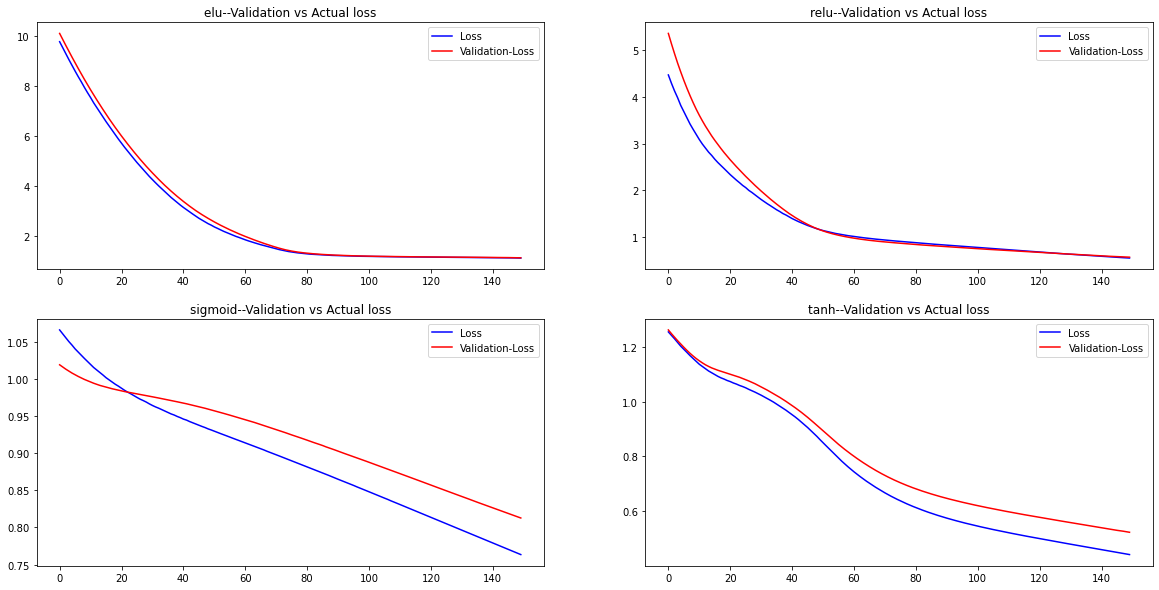

In [58]:
plt.figure(figsize= (20, 10))

for i in range(0 , len(models)):
    plt.subplot(2,2,i+1)
    plt.plot(models[i].history.history.get('loss'), color = "b"  , label = "Loss")
    plt.plot(models[i].history.history.get('val_loss') , color = "r"   , label ="Validation-Loss")
    plt.title(models[i].activation_fun +"--Validation vs Actual loss")
    plt.legend()